Model for motor 6:


100%|██████████| 1/1 [00:11<00:00, 11.31s/it]



 New run:

testing performance, max error is: 2.65914960495071
testing performance, mean root square error is: 0.535547026079499
testing performance, residual error > 1.4951569301804117: 5.6073361395069155%

 New run:

testing performance, accuracy is: 0.9595610342754058
testing performance, precision is: 0.9419191919191919
testing performance, recall: 0.6025848142164781
testing performance, F1: 0.734975369458128




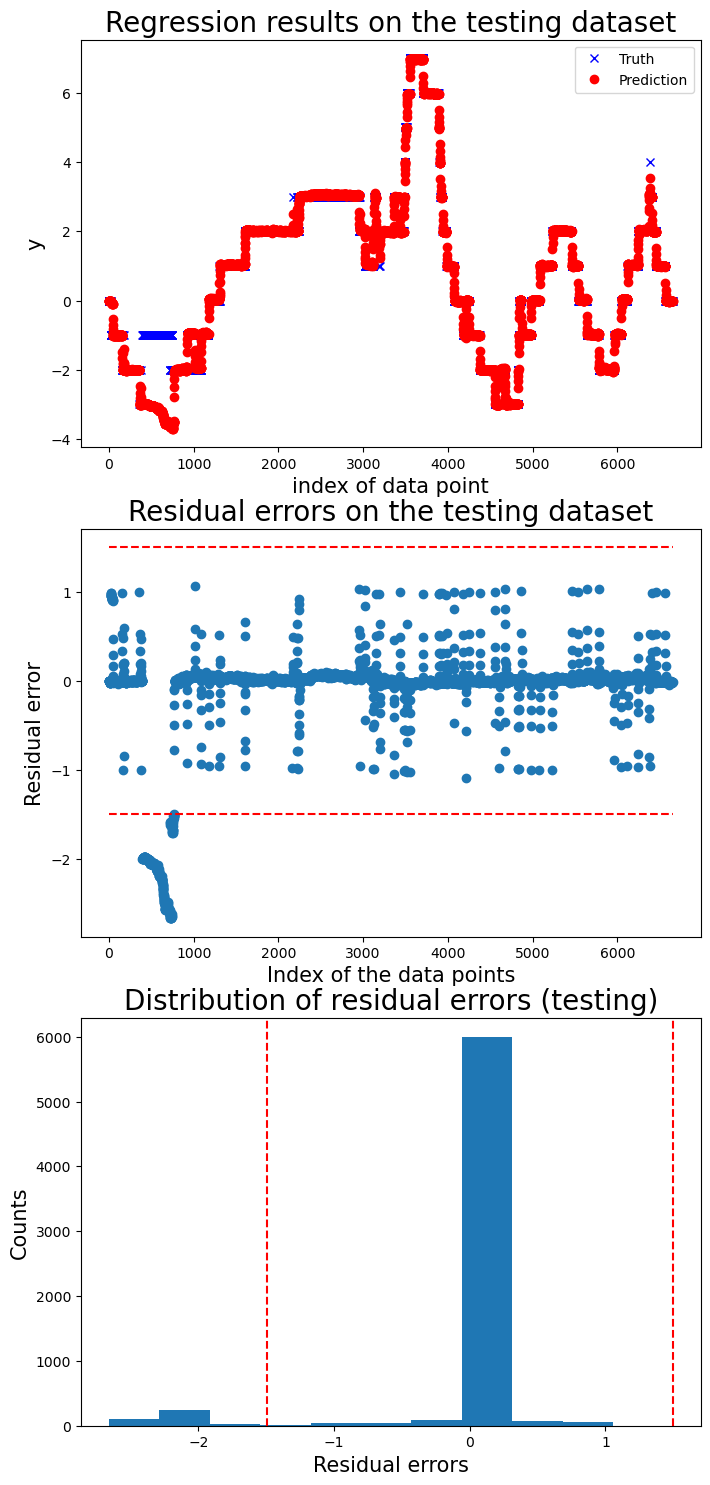

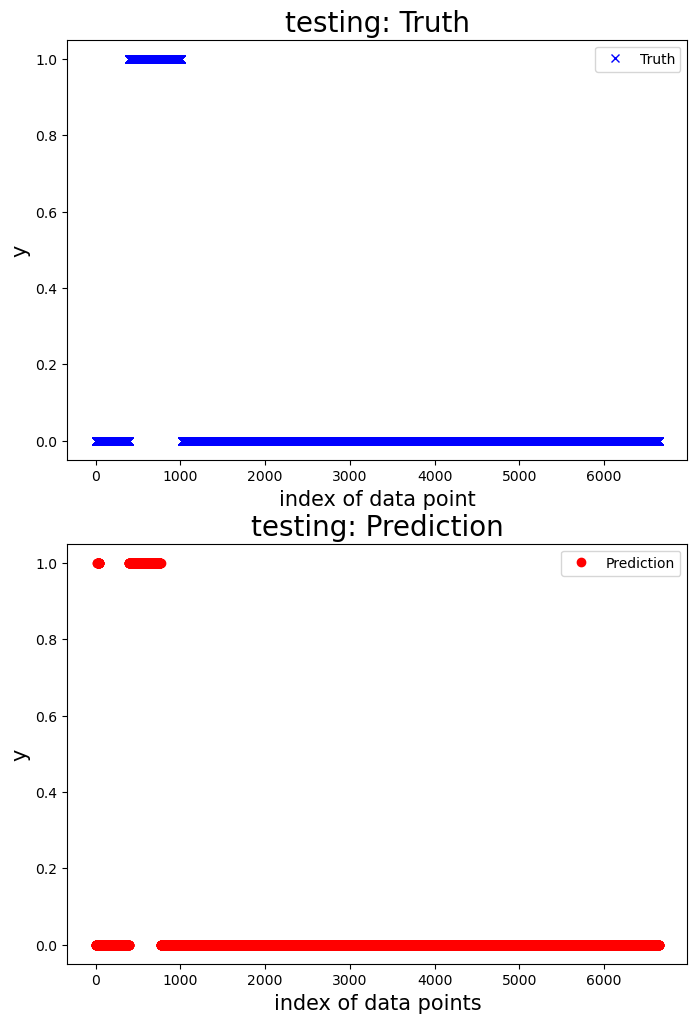

100%|██████████| 1/1 [00:00<00:00,  3.96it/s]



 New run:

testing performance, max error is: 3.897739153141875
testing performance, mean root square error is: 1.5097742874188718
testing performance, residual error > 0.9: 41.125541125541126%

 New run:

testing performance, accuracy is: 0.8744588744588745
testing performance, precision is: 0.7789473684210526
testing performance, recall: 0.9024390243902439
testing performance, F1: 0.8361581920903954




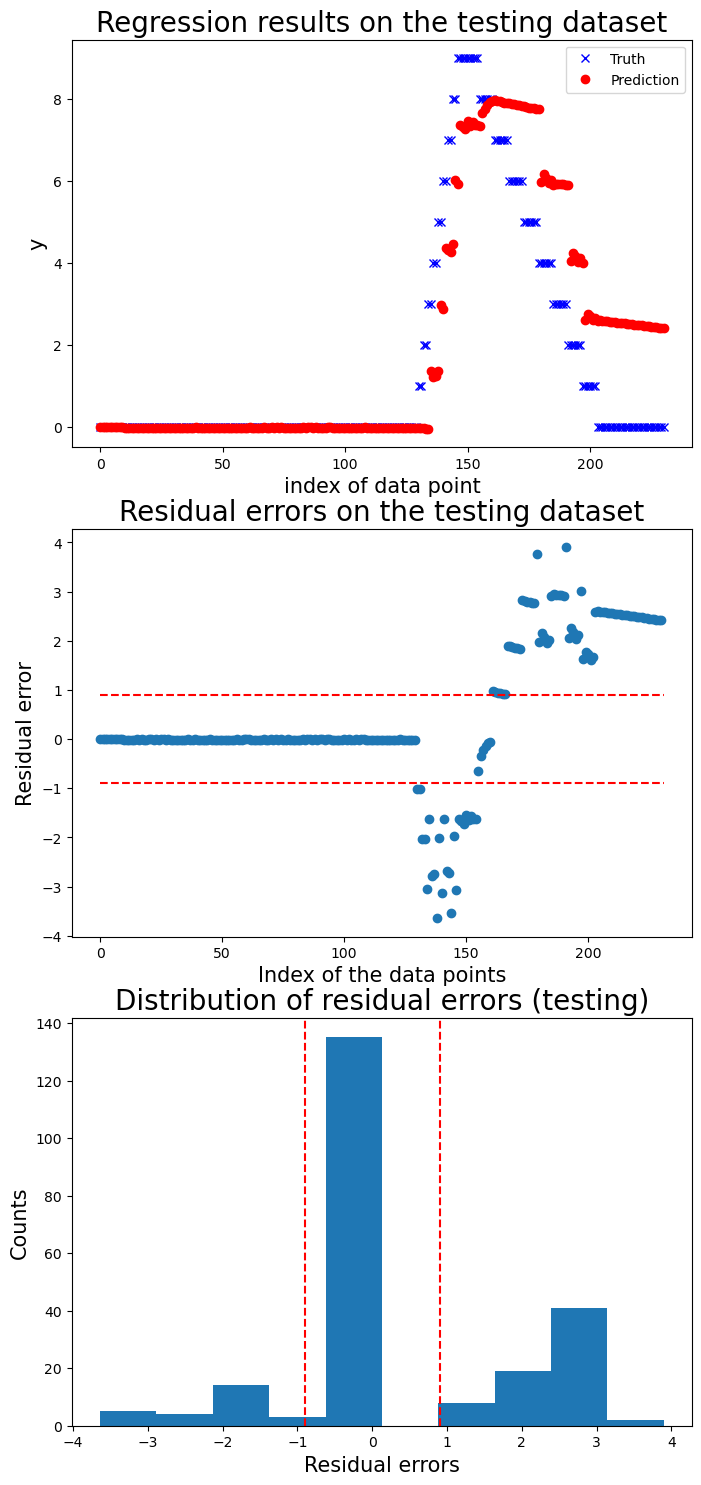

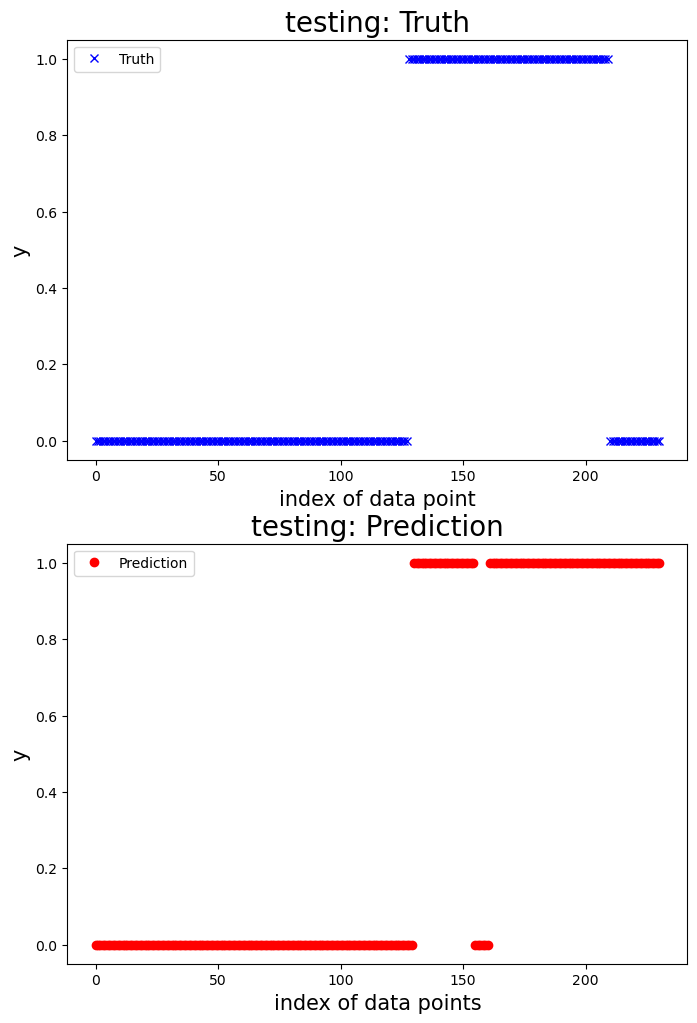

100%|██████████| 1/1 [00:00<00:00,  1.60it/s]



 New run:

testing performance, max error is: 3.034703952768668
testing performance, mean root square error is: 0.5243130925886359
testing performance, residual error > 0.9: 17.142857142857142%

 New run:

testing performance, accuracy is: 0.9017857142857143
testing performance, precision is: 0.8854166666666666
testing performance, recall: 0.6589147286821705
testing performance, F1: 0.7555555555555554




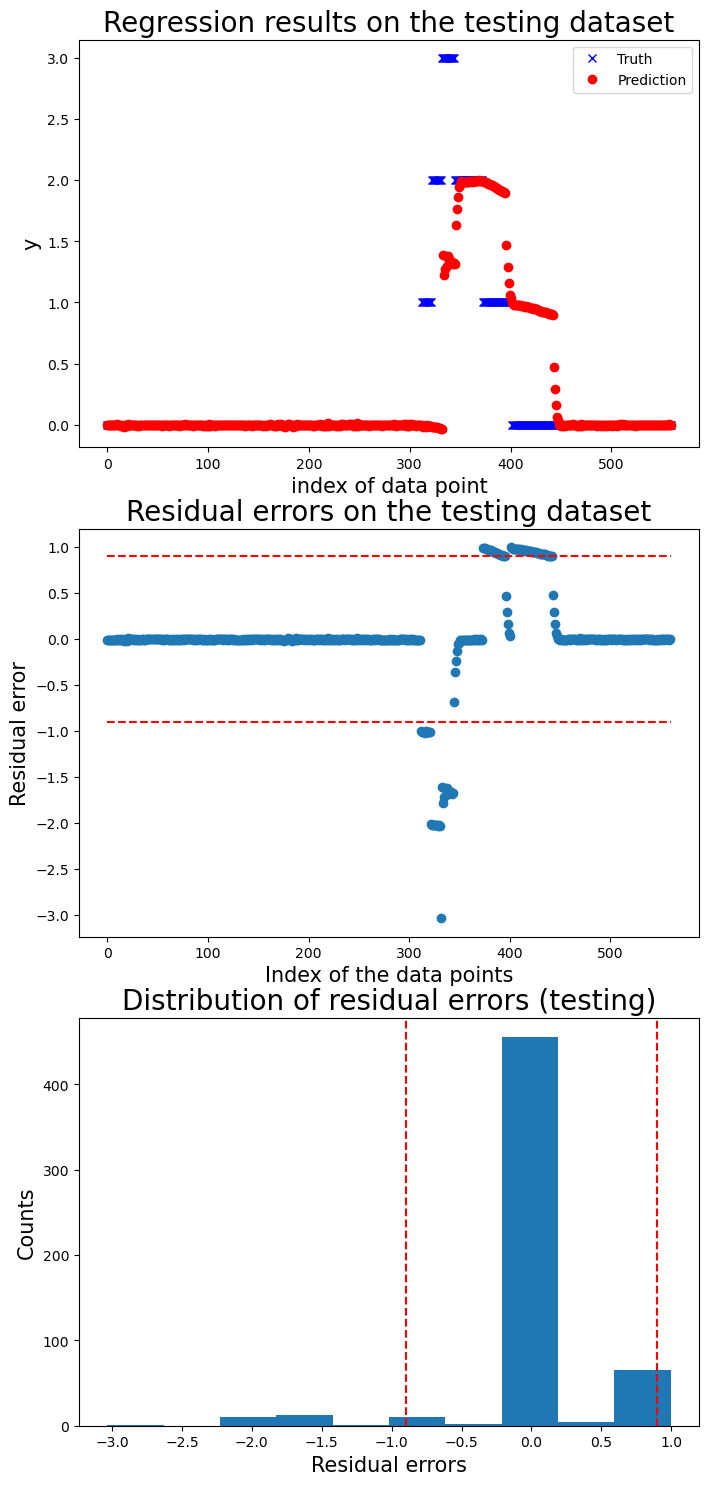

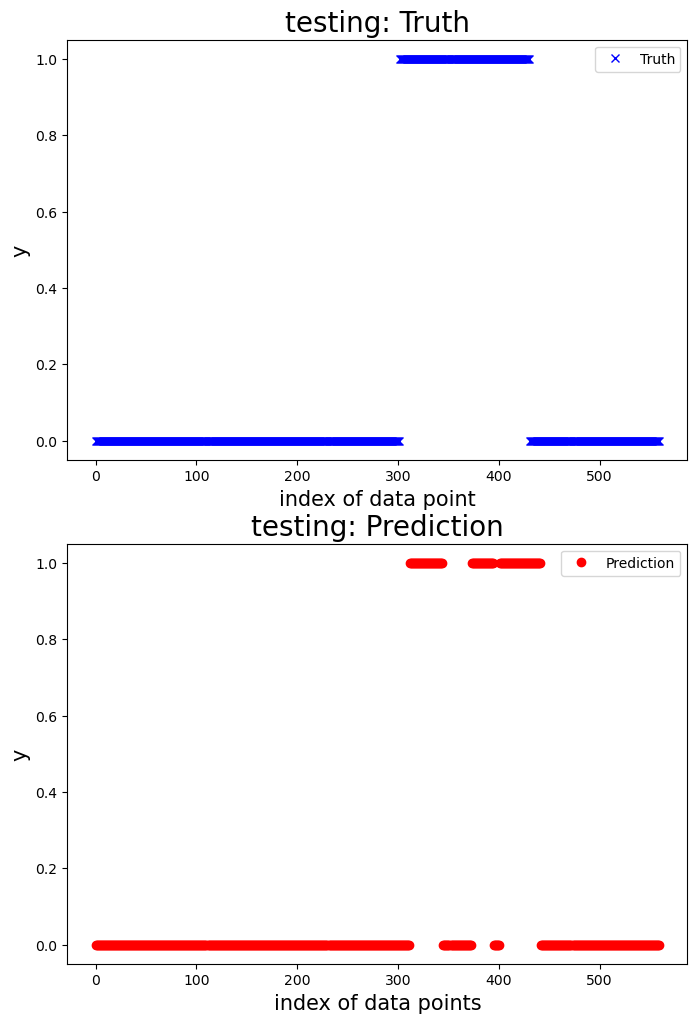

100%|██████████| 1/1 [00:01<00:00,  1.20s/it]



 New run:

testing performance, max error is: 2.0395365195631716
testing performance, mean root square error is: 0.24029356369291632
testing performance, residual error > 0.9: 3.3524904214559386%

 New run:

testing performance, accuracy is: 0.9731800766283525
testing performance, precision is: 1.0
testing performance, recall: 0.5555555555555556
testing performance, F1: 0.7142857142857143




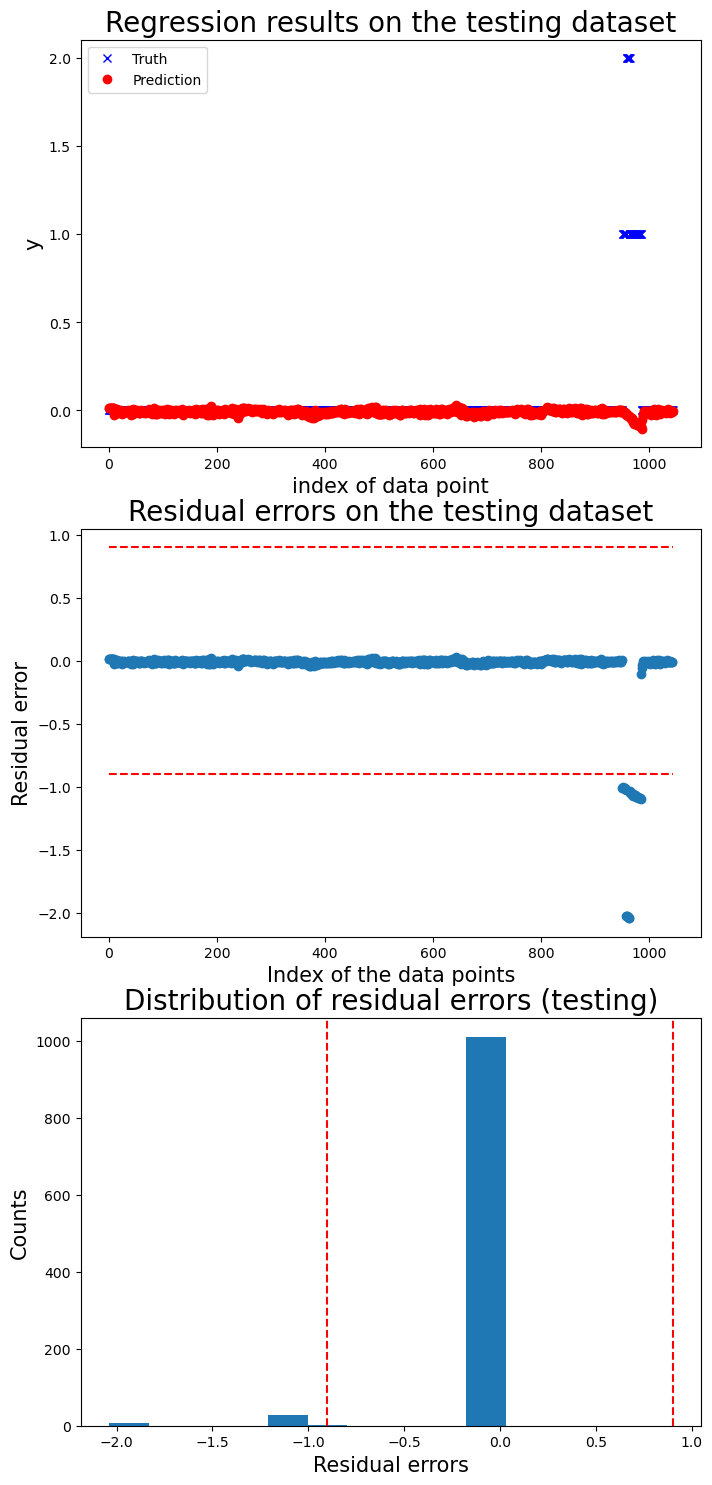

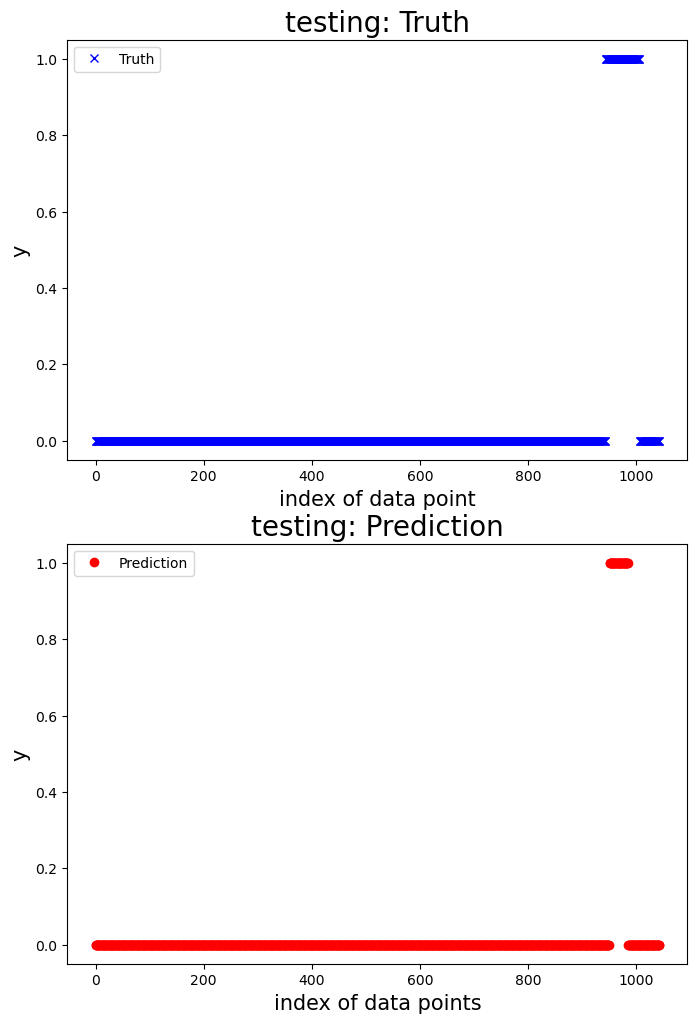

100%|██████████| 1/1 [00:01<00:00,  1.38s/it]



 New run:

testing performance, max error is: 3.9517417635870578
testing performance, mean root square error is: 1.2245346341354795
testing performance, residual error > 0.9: 43.51610095735422%

 New run:

testing performance, accuracy is: 0.8076588337684943
testing performance, precision is: 0.626
testing performance, recall: 0.9020172910662824
testing performance, F1: 0.7390791027154664




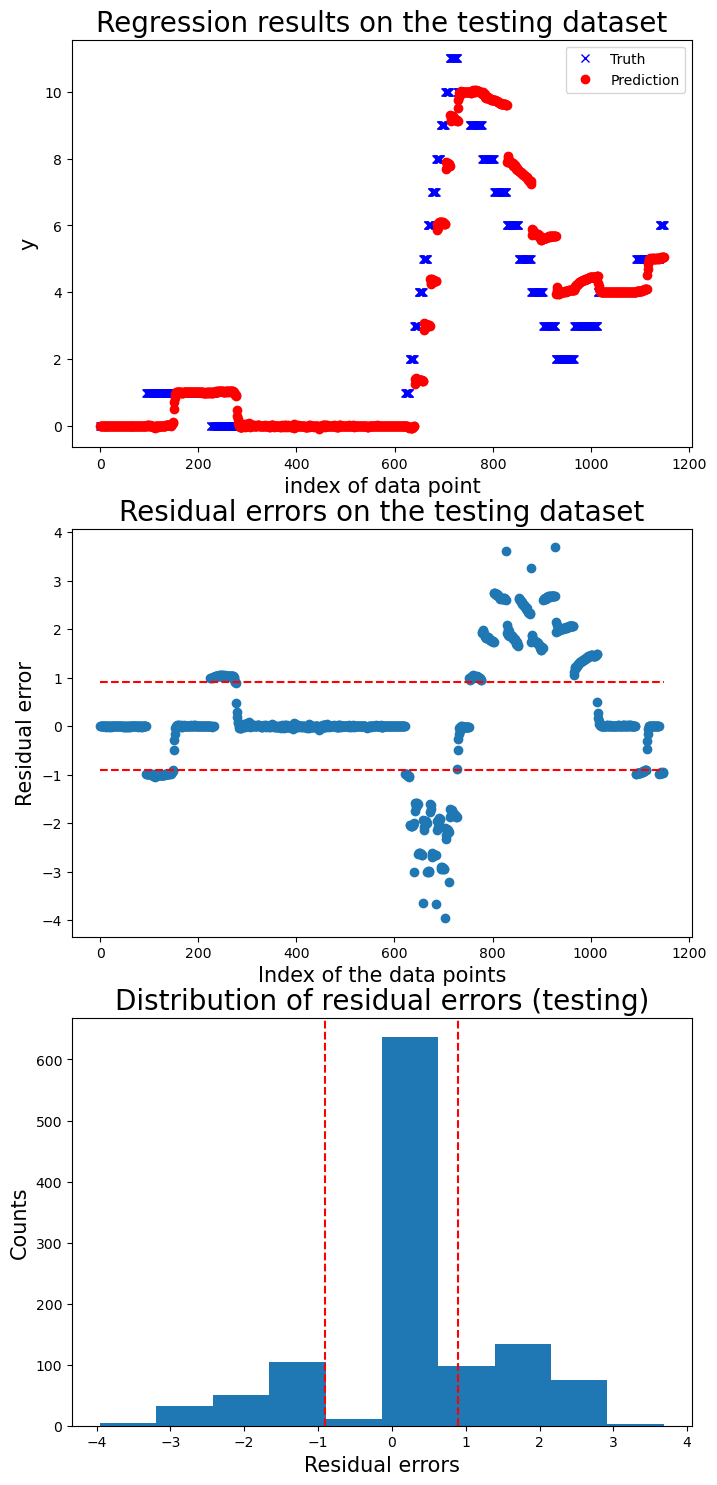

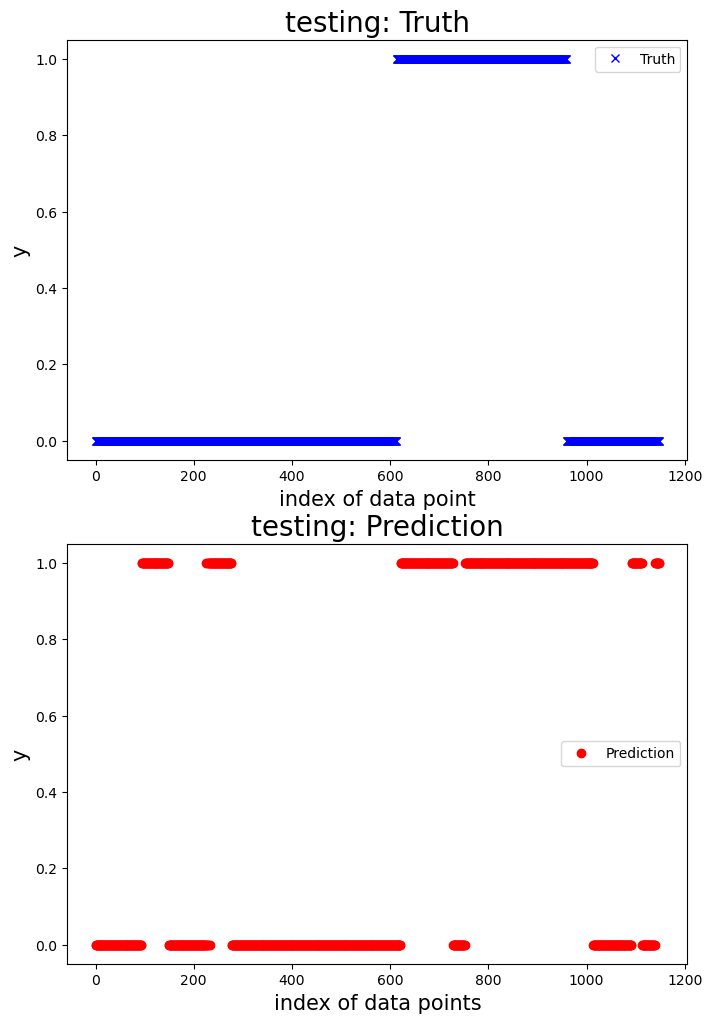

100%|██████████| 1/1 [00:00<00:00,  1.20it/s]



 New run:

testing performance, max error is: 4.040795968117454
testing performance, mean root square error is: 1.7348333855788611
testing performance, residual error > 0.9: 66.2771285475793%

 New run:

testing performance, accuracy is: 0.7979966611018364
testing performance, precision is: 0.9521410579345088
testing performance, recall: 0.7875
testing performance, F1: 0.8620296465222348




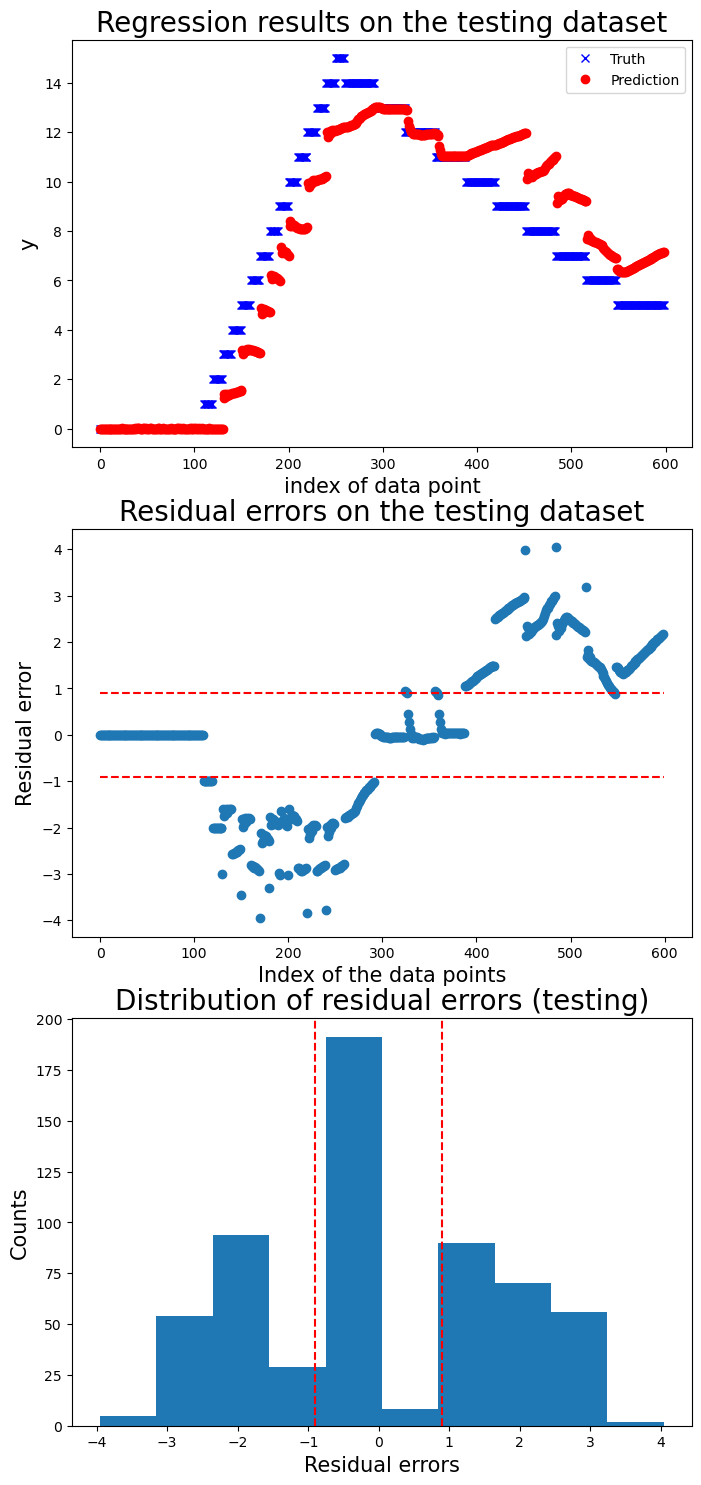

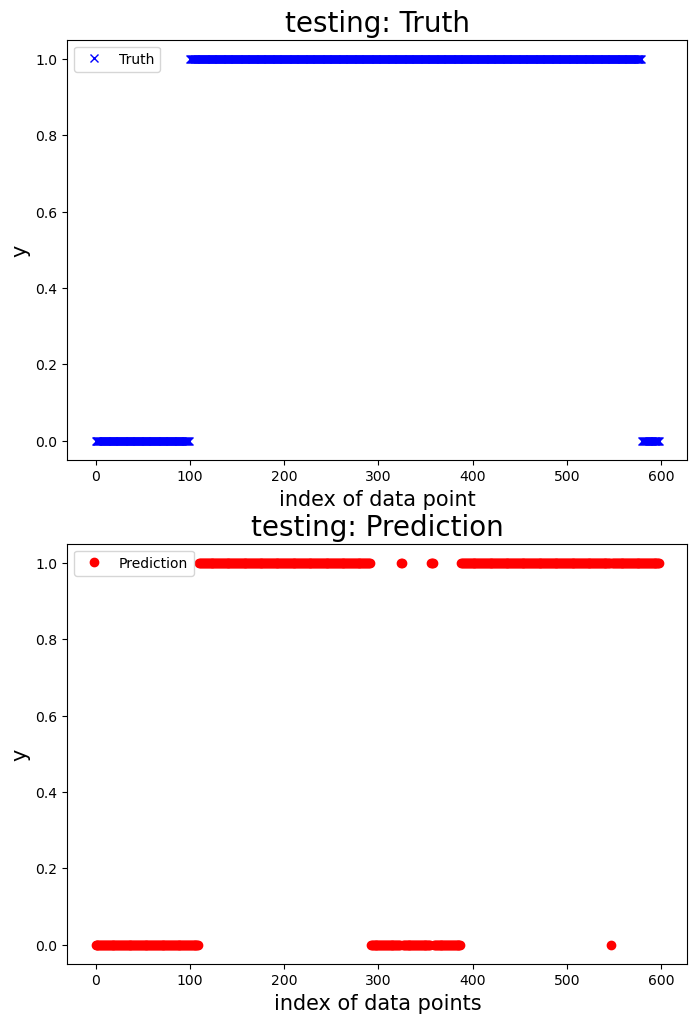

100%|██████████| 1/1 [00:00<00:00,  1.23it/s]



 New run:

testing performance, max error is: 2.947879916740471
testing performance, mean root square error is: 1.1625813754906387
testing performance, residual error > 1.4973661656336503: 18.91891891891892%

 New run:

testing performance, accuracy is: 0.5212355212355212
testing performance, precision is: 0.1261682242990654
testing performance, recall: 0.12735849056603774
testing performance, F1: 0.1267605633802817




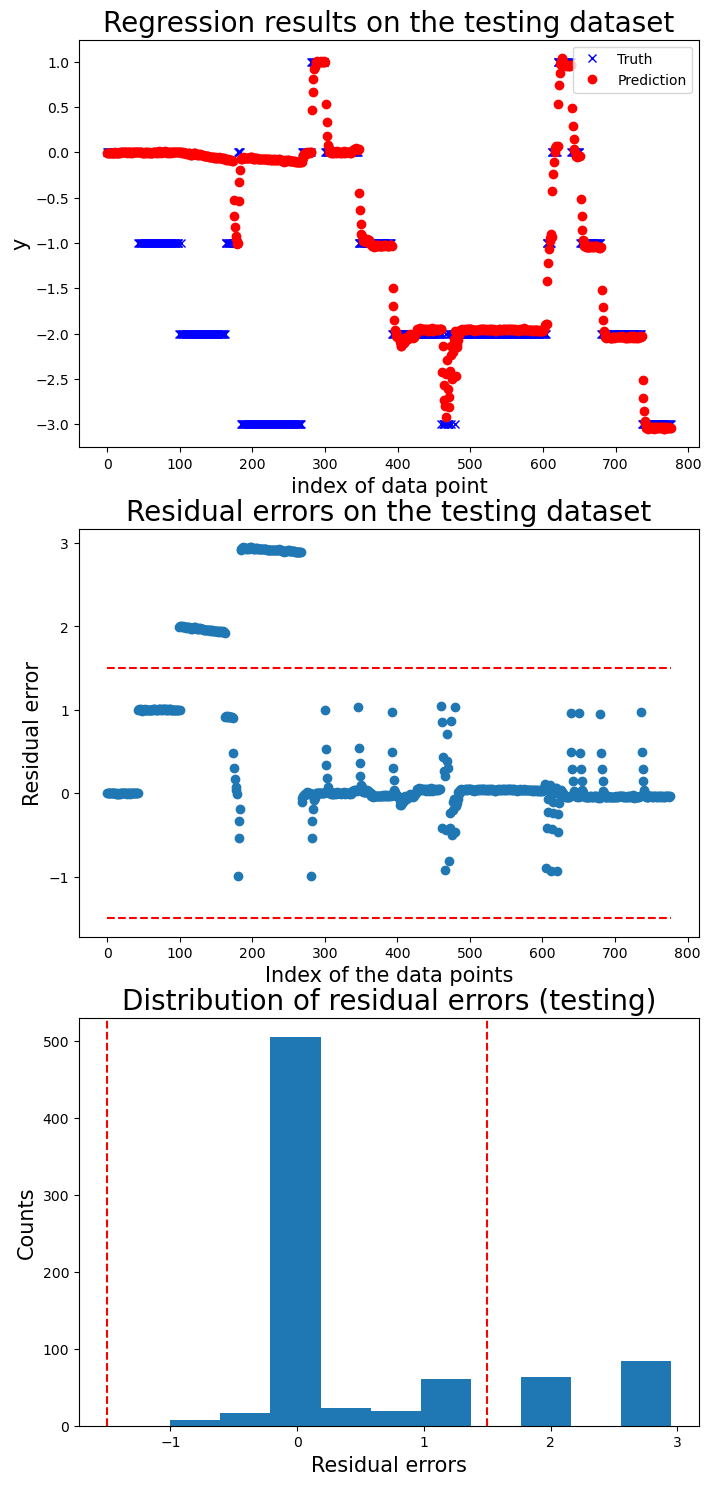

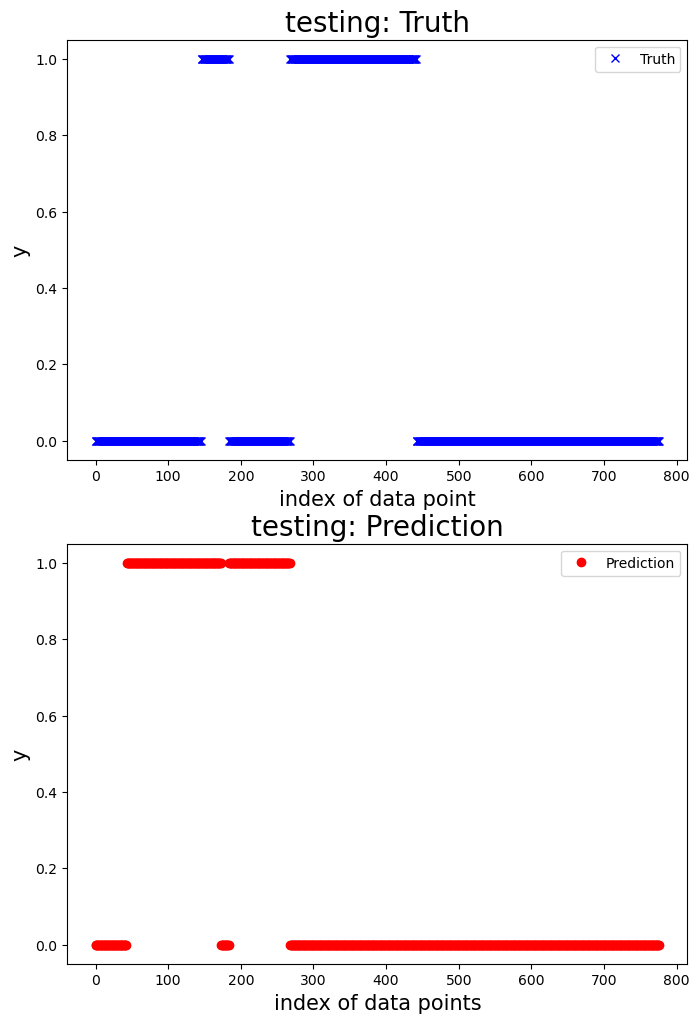

   Accuracy  Precision    Recall  F1 score
0  0.959561   0.941919  0.602585  0.734975
1  0.874459   0.778947  0.902439  0.836158
2  0.901786   0.885417  0.658915  0.755556
3  0.973180   1.000000  0.555556  0.714286
4  0.807659   0.626000  0.902017  0.739079
5  0.797997   0.952141  0.787500  0.862030
6  0.521236   0.126168  0.127358  0.126761


Mean performance metric and standard error:
Accuracy: 0.8337 +- 0.1534
Precision: 0.7587 +- 0.3064
Recall: 0.6481 +- 0.2679
F1 score: 0.6813 +- 0.2507




In [1]:
utility_path = '../'
import sys
sys.path.insert(1, utility_path)

# Test the class FaultDetectReg

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from utility import read_all_test_data_from_path, extract_selected_feature, prepare_sliding_window, FaultDetectReg


def remove_outliers(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges. 
    Define a valid range of temperature and voltage. 
    Use ffil function to replace the invalid measurement with the previous value.
    '''
    df['temperature'] = df['temperature'].where(df['temperature'] <= 100, np.nan)
    df['temperature'] = df['temperature'].where(df['temperature'] >= 0, np.nan)
    df['temperature'] = df['temperature'].ffill()
    df['temperature'] = df['temperature'] - df['temperature'].iloc[0]

    df['voltage'] = df['voltage'].where(df['voltage'] >= 6000, np.nan)
    df['voltage'] = df['voltage'].where(df['voltage'] <= 9000, np.nan)
    df['voltage'] = df['voltage'].ffill()
    df['voltage'] = df['voltage'] - df['voltage'].iloc[0]

    df['position'] = df['position'].where(df['position'] >= 0, np.nan)
    df['position'] = df['position'].where(df['position'] <= 1000, np.nan)
    df['position'] = df['position'].ffill()
    df['position'] = df['position'] - df['position'].iloc[0]


# Read data.
base_dictionary = 'C:/Users/Zhiguo/OneDrive - CentraleSupelec/Code/Python/digital_twin_robot/projects/maintenance_industry_4_2024/dataset/training_data/'
df_data = read_all_test_data_from_path(base_dictionary, remove_outliers, is_plot=False)

# Pre-train the model.
# Get all the normal data.
normal_test_id = ['20240105_164214', 
    '20240105_165300', 
    '20240105_165972', 
    '20240320_152031', 
    '20240320_153841', 
    '20240320_155664', 
    '20240321_122650', 
    '20240325_135213',
    '20240325_152902', 
    '20240426_141190', 
    '20240426_141532', 
    '20240426_141602', 
    '20240426_141726', 
    '20240426_141938', 
    '20240426_141980', 
    '20240503_164435']

df_tr = df_data[df_data['test_condition'].isin(normal_test_id)]

feature_list_all = ['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage',
                'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage',
                'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage',
                'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage',
                'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage',
                'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']

# feature_list_all = ['time', 'data_motor_1_position', 
#                 'data_motor_2_position', 
#                 'data_motor_3_position', 
#                 'data_motor_4_position', 
#                 'data_motor_5_position', 
#                 'data_motor_6_position', 'data_motor_6_temperature']

# Prepare feature and response of the training dataset.
x_tr_org, y_temp_tr_org = extract_selected_feature(df_data=df_tr, feature_list=feature_list_all, motor_idx=6, mdl_type='reg')

# Enrich the features based on the sliding window.
window_size = 10
sample_step = 1
prediction_lead_time = 1 
threshold = .9
abnormal_limit = 3

x_tr, y_temp_tr = prepare_sliding_window(df_x=x_tr_org, y=y_temp_tr_org, window_size=window_size, sample_step=sample_step, prediction_lead_time=prediction_lead_time, mdl_type='reg')

# Define the steps of the pipeline
steps = [
    ('standardizer', StandardScaler()),  # Step 1: StandardScaler
    ('regressor', LinearRegression())    # Step 2: Linear Regression
]

# Create the pipeline
mdl_linear_regreession = Pipeline(steps)
# Fit the model
mdl = mdl_linear_regreession.fit(x_tr, y_temp_tr)

# Test data.
test_id = [
    '20240325_155003',
    '20240425_093699',
    '20240425_094425',
    '20240426_140055',
    '20240503_163963',
    '20240503_164675',
    '20240503_165189'
]
df_test = df_data[df_data['test_condition'].isin(test_id)]

# Define the fault detector.
detector_reg = FaultDetectReg(reg_mdl=mdl, threshold=threshold, abnormal_limit=abnormal_limit, window_size=window_size, sample_step=sample_step, pred_lead_time=prediction_lead_time)

# # Test
# _, y_label_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='clf')
# x_test_org, y_temp_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='reg')

# # Predict the temperature
# detector_reg.threshold = 1
# y_label_pred_tr, y_temp_pred_tr = detector_reg.predict(df_x_test=x_tr_org, y_response_test=y_temp_tr_org)
# y_label_pred_tmp, y_temp_pred_tmp = detector_reg.predict(df_x_test=x_test_org, y_response_test=y_temp_test_org)

# # Get the true values.
# _, y_label_test = prepare_sliding_window(df_x=x_test_org, y=y_label_test_org, sequence_name_list=test_id, window_size=window_size, sample_step=sample_step, prediction_lead_time=prediction_lead_time, mdl_type='clf')
# _, y_temp_test_seq = prepare_sliding_window(df_x=x_test_org, y=y_temp_test_org, sequence_name_list=test_id, window_size=window_size, sample_step=sample_step, prediction_lead_time=prediction_lead_time, mdl_type='reg')


# show_reg_result(y_tr=y_temp_tr, y_test=y_temp_test_seq, y_pred_tr=y_temp_pred_tr, y_pred=y_temp_pred_tmp, threshold=detector_reg.threshold)
# show_clf_result(y_tr=np.zeros(len(y_label_pred_tr)), y_test=y_label_test, y_pred_tr=y_label_pred_tr, y_pred=y_label_pred_tmp)

# # Run cross validation
n_fold = 7
_, y_label_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='clf')
x_test_org, y_temp_test_org = extract_selected_feature(df_data=df_test, feature_list=feature_list_all, motor_idx=6, mdl_type='reg')

motor_idx = 6
print(f'Model for motor {motor_idx}:')
# Run cross validation.
df_perf = detector_reg.run_cross_val(df_x=x_test_org, y_label=y_label_test_org, y_response=y_temp_test_org, 
                                        n_fold=n_fold)
print(df_perf)
print('\n')
# Print the mean performance and standard error.
print('Mean performance metric and standard error:')
for name, metric, error in zip(df_perf.columns, df_perf.mean(), df_perf.std()):
    print(f'{name}: {metric:.4f} +- {error:.4f}') 
print('\n')